<a href="https://colab.research.google.com/github/guillermusmax/AppNotas/blob/main/Copy_of_ids330l_semana08_redes_recurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS330L | Semana 08 - Redes Recurrentes

## Analisis de Sentimiento
El proceso de evaluar las emociones de un conjunto de palabras utilizando Procesamiento de Lenguaje Natural.

Por ejemplo:
x: "Esta pelicula me parece fantastica"
y: Positiva
f("Esta pelicula me parece fantastica") = 90% Positiva

---

En Pytorch, las capas de RNN se definen con el paquete `torch.nn.RNN`.

https://pytorch.org/docs/stable/generated/torch.nn.RNN.html

**Parametros**
* input_size: el numero de features en la entrada x
* hidden_size: la dimension del estado oculto *h*
* num_layers: numero de capas recurrentes
* bidirectional: (bool) si `True`, la red es bidirectional
* batch_first: (bool) si `True`, el input y el output tendran una dimension `(batch_size, seq_len, feature_size)`

**Input**
* input: dimension de `(batch_size, seq_len, feature_size)`, si `batch_first = True`
* h0: tensor que contiene el estado oculto inicial. Su dimension es de `(num_layers * num_directions, batch_size, hidden_size)`

**Output**
* output: tensor que contiene los *features* de la ultima capa de la RNN. Tiene dimension de `(batch_size, seq_len, feature_size)`, si `batch_first = True`
* hn: tensor que contiene el estado oculto final. Su dimension es de `(num_layers * num_directions, batch_size, hidden_size)`

In [ ]:
import torch

## RNN de una sola capa
# input_size = 5
# seq_len = 10
# hidden_size = 2

x = torch.rand(1, 10, 5)   # una sola oracion con 10 palabras, y cada palabra son 5 numeros
h0 = torch.rand(1, 1, 2)   # una sola capa para una sola oracion y el vector tiene 2 numeros
rnn = torch.nn.RNN(input_size=5, hidden_size=2, num_layers=1, bidirectional=False, batch_first=True)
output, h_n = rnn(x, h0)

In [ ]:
output.size()

torch.Size([1, 10, 2])

In [ ]:
h_n.size()

torch.Size([1, 1, 2])

### Descargar la data

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 2

In [ ]:
from datasets import load_dataset
dataset = load_dataset("5cp/imdb_review_prompts", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/782 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/858 [00:00<?, ? examples/s]

In [ ]:
train_texts = dataset['train']['text']
train_labels = dataset['train']['label']
test_texts = dataset['test']['text']
test_labels = dataset['test']['label']

In [ ]:
train_texts = [text.split('###')[2].replace('Review: ', '') for text in train_texts]
test_texts = [text.split('###')[2].replace('Review: ', '') for text in test_texts]

### Preprocesamiento

In [ ]:
!pip install string

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string


In [ ]:
# Eliminando signos de puntuacion

punctuation = "!#$%&'()*+,-./:;<=>?@[\]^_`{|}~"

train_reviews = [review.lower() for review in train_texts]
test_reviews = [review.lower() for review in test_texts]

train_reviews = [''.join([c for c in review if c not in punctuation]) for review in train_reviews]
test_reviews = [''.join([c for c in review if c not in punctuation]) for review in test_reviews]


In [ ]:
# Crear el listado de vocabulario
from collections import Counter

all_texts = ' '.join(train_reviews + test_reviews)
words = all_texts.split()
count_words = Counter(words)
sorted_words = count_words.most_common(len(words))
vocab_to_int = {word:i+1 for i, (word, _) in enumerate(sorted_words)}

In [ ]:
vocab_to_int

{'the': 1,
 'a': 2,
 'this': 3,
 'and': 4,
 'of': 5,
 'it': 6,
 'is': 7,
 'i': 8,
 'to': 9,
 'movie': 10,
 'in': 11,
 'was': 12,
 'film': 13,
 'that': 14,
 'you': 15,
 'but': 16,
 'one': 17,
 'for': 18,
 'with': 19,
 'not': 20,
 'its': 21,
 'have': 22,
 'good': 23,
 'great': 24,
 'as': 25,
 'br': 26,
 'on': 27,
 'be': 28,
 'all': 29,
 'are': 30,
 'very': 31,
 'so': 32,
 'bad': 33,
 'if': 34,
 'my': 35,
 'like': 36,
 'see': 37,
 'an': 38,
 'just': 39,
 'at': 40,
 'really': 41,
 'movies': 42,
 'time': 43,
 'from': 44,
 'acting': 45,
 'seen': 46,
 'story': 47,
 'about': 48,
 'ever': 49,
 'has': 50,
 'out': 51,
 'watch': 52,
 'by': 53,
 'me': 54,
 'what': 55,
 'best': 56,
 'more': 57,
 'some': 58,
 'there': 59,
 'even': 60,
 'can': 61,
 'only': 62,
 'dont': 63,
 'plot': 64,
 'who': 65,
 'well': 66,
 'no': 67,
 'his': 68,
 'made': 69,
 'they': 70,
 'would': 71,
 'love': 72,
 'he': 73,
 'had': 74,
 'will': 75,
 'when': 76,
 'or': 77,
 'funny': 78,
 'worst': 79,
 'much': 80,
 'do': 81,
 'too'

In [ ]:
# Convertir labels en numpy
import numpy as np

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
# Convertir reviews en valores numericos

train_reviews_int = []
for review in train_reviews:
    review_int = [vocab_to_int[word] for word in review.split()]
    train_reviews_int.append(review_int)

test_reviews_int = []
for review in test_reviews:
    review_int = [vocab_to_int[word] for word in review.split()]
    test_reviews_int.append(review_int)

In [ ]:
def pad_sequence(reviews_int: list, seq_len: int) -> np.array:

    features = np.zeros((len(reviews_int), seq_len), dtype=int)

    for i, review in enumerate(reviews_int):

        review_len = len(review)

        if review_len <= seq_len:
            zeroes = list(np.zeros(seq_len - review_len))
            new_review = zeroes + review
        else:
            new_review = review[:seq_len]
        features[i, :] = np.array(new_review)

    return features


seq_len = np.array([len(review) for review in train_reviews_int + train_reviews_int]).max()
padded_train_reviews = pad_sequence(train_reviews_int, seq_len)
padded_test_reviews = pad_sequence(test_reviews_int, seq_len)




In [ ]:
padded_train_reviews

array([[   0,    0,    0, ...,    2,  227,   43],
       [   0,    0,    0, ...,    3,  750,  320],
       [   0,    0,    0, ...,  176,   82,  227],
       ...,
       [   0,    0,    0, ...,  139,    2,  177],
       [   0,    0,    0, ...,    6,  445, 1064],
       [   0,    0,    0, ...,   18,  203,  294]])

### Cargar los reviews como Tensores

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64  # 64, 128, 256, 512...

train_data = TensorDataset(
    torch.from_numpy(padded_train_reviews),
    torch.from_numpy(train_labels))
test_data = TensorDataset(
    torch.from_numpy(padded_test_reviews),
    torch.from_numpy(test_labels))

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
next(iter(train_data))

(tensor([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0, 2225, 3491,    7,  140,   38,  749,   47,
            9, 3492,   16,    3,   10,    7,  272,   21,   38, 1180,   47,  363,
            6,  411,   36,    6,   12,  379,   11, 1181,  105, 2225,   12,   38,
         1180,  363,   73,   50,   38, 1702, 3493,    7,    1,   79,   13,    8,
           22,   46,   11,    2,  227,   43]),
 tensor(0))

In [ ]:
# Chequear la data
batch = next(iter(train_loader))
inputs, labels = batch

print("Input size:", inputs.size())
print("Inputs:", inputs)

print("Labels size:", labels.size())
print("Labels:", labels)

Input size: torch.Size([64, 66])
Inputs: tensor([[   0,    0,    0,  ...,   11,  161,  425],
        [   0,    0,    0,  ...,   37,   15,  115],
        [   0,    0,    0,  ..., 2515,   30, 2515],
        ...,
        [   0,    0,    0,  ...,   13,   18,   15],
        [   0,    0,    0,  ...,  139,    1,  975],
        [   0,    0,    0,  ...,  261,  261,  261]])
Labels size: torch.Size([64])
Labels: tensor([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])


### Definir Red Recurrente

In [ ]:
class SentimentAnalysis(torch.nn.Module):
    def __init__(self,
            vocab_size: int,
            embedding_dim: int,
            output_size: int,
            hidden_dim: int,
            num_layers: int):
        super().__init__()

        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        self.rnn = torch.nn.RNN(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )

        self.linear = torch.nn.Linear(hidden_dim, output_size)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x, h0):
        embeddings = self.embedding(x)
        output, h_n = self.rnn(embeddings, h0)
        output = output[:,-1,:]
        output = self.linear(output)
        output = self.sigmoid(output)
        return output




### Entrenamiento

In [ ]:
vocab_size = len(vocab_to_int) + 1    #+1 por el padding '0'
output_size = 1

#### PUEDEN MODIFICAR ESTA PARTE ####
embedding_dim = 10000
hidden_dim = 128
num_layers = 2
learning_rate = 0.0001
num_epochs = 100
#####################################

model = SentimentAnalysis(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    output_size=output_size,
    hidden_dim=hidden_dim,
    num_layers=num_layers)
loss_function = torch.nn.BCELoss()   # Binary CrossEntropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# GPU
model.cuda()
model.train()

losses = []
accuracies = []
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Poniendo los inputs al GPU
        inputs = inputs.cuda()
        labels = labels.cuda()

        # Inicializando estado
        batch_size = inputs.size(0)
        h0 = torch.randn(num_layers, batch_size, hidden_dim)
        h0 = h0.cuda()

        # Entrenando
        optimizer.zero_grad()
        outputs = model(inputs, h0)
        outputs = outputs.squeeze()
        loss = loss_function(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # Calculando accuracy
        pred = (outputs > 0.5).float()
        acc = torch.mean((pred == labels).float())

        losses.append(loss.item())
        accuracies.append(acc.item())



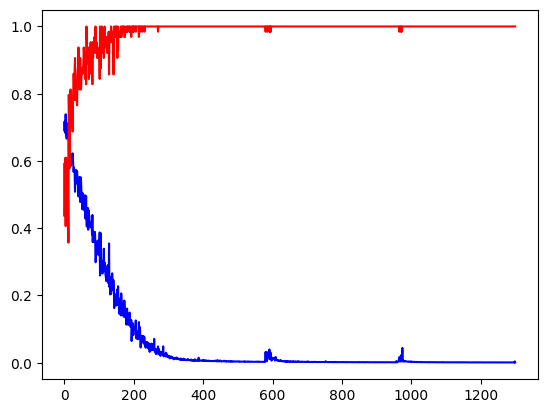

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses, 'b')
plt.plot(accuracies, 'r')
plt.show()

### Evaluar

In [ ]:
model.eval()
accuracy = 0
total_inputs = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        # Poniendo los inputs al GPU
        inputs = inputs.cuda()
        labels = labels.cuda()

        # Inicializando estado
        batch_size = inputs.size(0)
        h0 = torch.randn(num_layers, batch_size, hidden_dim)
        h0 = h0.cuda()

        # Entrenando
        outputs = model(inputs, h0)
        outputs = outputs.squeeze()

        # Calculando accuracy
        pred = (outputs > 0.5).float()
        acc = torch.sum((pred == labels).float())
        accuracy += acc.item()
        total_inputs += inputs.size(0)


accuracy = accuracy/total_inputs
print(f"Accuracy: {100*accuracy:.2f}%")

Accuracy: 71.33%


In [ ]:
import random

def int_to_voc(val, my_dict):
    for word, value in my_dict.items():
        if val==value:
            return word

model.cpu()
review, label = random.choice(train_data)
review_sentence = ' '.join([int_to_voc(val, vocab_to_int) for val in review if val != 0])
print(review_sentence)

print("Actual sentiment:", "negative" if label.item() == 0 else "positive")

h0 = torch.randn(num_layers, 1, hidden_dim)
output = model(review.unsqueeze(0), h0)
sentiment = 'negative' if output < 0.5 else 'positive'
print("Pred. Sentiment:", sentiment)


another wonderful patterson book made into an incredibly awful movie if the big budget movies dont work then why make a low budget made for tv movie thats 10 times worse i am desperate for a good movie that will do one of his books justice
Actual sentiment: negative
Pred. Sentiment: negative
